HOME LOAN APPROVAL

PROBLEM STATEMENT

Dream Housing Finance Company, a leading provider of home loans, serves clients in urban, semi-urban, and rural areas alike. The process begins when a customer submits an application for a home loan. Following the application, the company conducts a thorough evaluation to determine the customer's eligibility. This validation step ensures that each applicant meets the necessary criteria for loan approval, reflecting the company's commitment to offering tailored financial solutions across diverse regions.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("C://Users//NIRBHAY IMI-K//Desktop//Assignment ML//loan_sanction_train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [35]:
df.shape

(614, 13)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


FINDING THE MISSING VALUE

In [37]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
df.dropna(inplace=True)
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
df.drop(["Loan_ID"], axis=1,inplace=True)

In [40]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [41]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [42]:
df.duplicated().sum()

0

PERFORMING SCALING AND ENCODING

In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [44]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [45]:
df['Gender']=le.fit_transform(df['Gender'])
df['Married']=le.fit_transform(df['Married'])
df['Dependents']=le.fit_transform(df['Dependents'])
df['Education']=le.fit_transform(df['Education'])
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Property_Area']=le.fit_transform(df['Property_Area'])
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [47]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [48]:
df['ApplicantIncome'] = ss.fit_transform(df['ApplicantIncome'].values.reshape(-1, 1))
df['CoapplicantIncome'] = ss.fit_transform(df['CoapplicantIncome'].values.reshape(-1, 1))
df['LoanAmount'] = ss.fit_transform(df['LoanAmount'].values.reshape(-1, 1))
df['Loan_Amount_Term'] = ss.fit_transform(df['Loan_Amount_Term'].values.reshape(-1, 1))

In [49]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0
2,1,1,0,0,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,2,1
3,1,1,0,1,0,-0.491180,0.297100,-0.307562,0.275542,1.0,2,1
4,1,0,0,0,0,0.112280,-0.604633,-0.046446,0.275542,1.0,2,1
5,1,1,2,0,1,0.009319,0.999978,1.520245,0.275542,1.0,2,1


In [50]:
df['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

In [51]:
148/332

0.4457831325301205

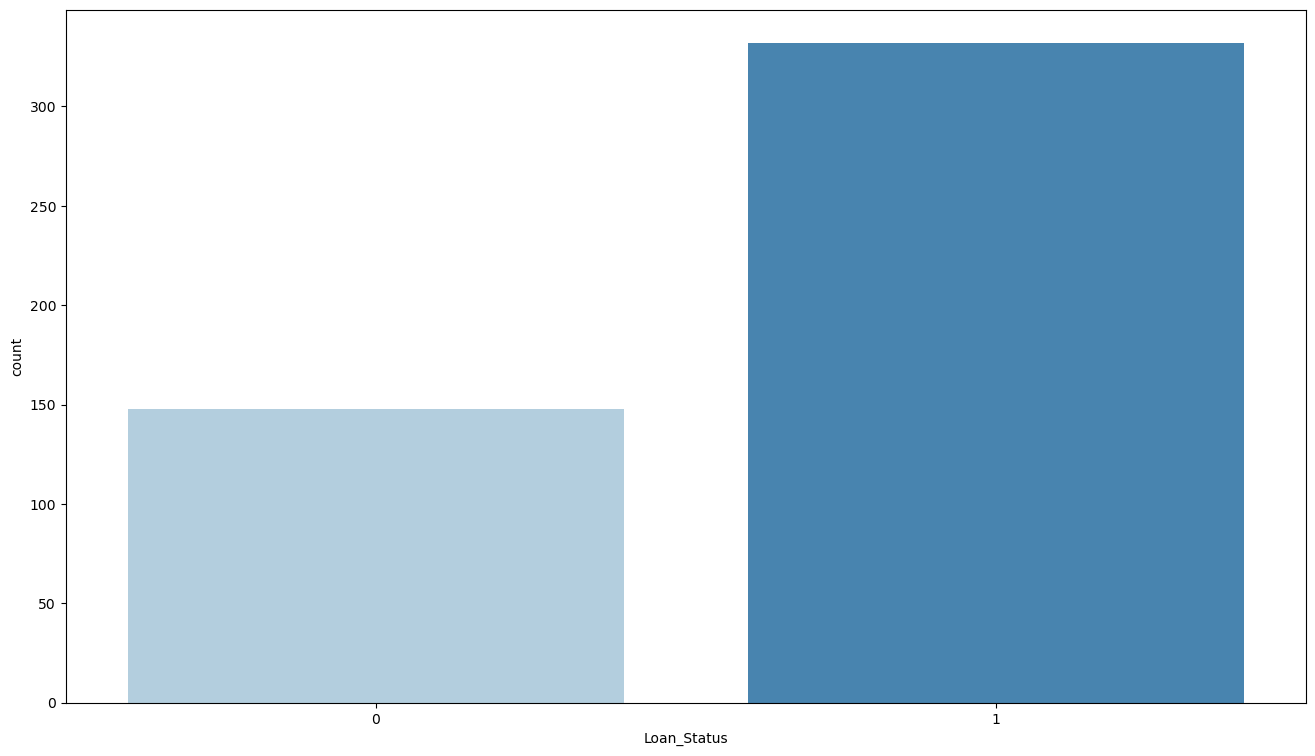

In [52]:
plt.figure(figsize=(16,9))
sns.countplot(x = 'Loan_Status',data = df,palette ='Blues' )
plt.show()

In [70]:
X = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y=df['Loan_Status']

In [71]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int32

DIVIDING THE DATA INTO TRAINING AND TESTING

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3)

USING DECISION TREE CLASSIFIER

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dt = DecisionTreeClassifier()

In [75]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
578,1,1,1,0,0,-0.632641,0.248916,-0.469204,0.275542,1.0,0
67,1,1,1,0,0,0.951155,-0.604633,2.079778,0.275542,1.0,2
475,1,1,2,0,1,1.971051,-0.216865,0.065460,0.275542,1.0,0
537,1,0,2,0,0,-0.308570,-0.604633,-0.469204,0.275542,1.0,1
361,1,1,2,0,0,-0.064325,0.797681,1.134789,0.275542,1.0,1


In [77]:
y_train.head()

578    1
67     1
475    1
537    1
361    1
Name: Loan_Status, dtype: int32

In [78]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred = dt.predict(X_test)

In [80]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])

In [81]:
y_test

527    1
360    0
486    0
327    1
209    0
      ..
492    1
446    1
419    1
41     1
254    0
Name: Loan_Status, Length: 144, dtype: int32

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

PRINTING RESULTS OF CONFUSION MATRIX

In [84]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[27 20]
 [18 79]]
Accuracy: 0.7361111111111112
Precision: 0.733361391694725
Recall: 0.7361111111111112
F1 Score: 0.7345891255052747


INTERPRETATION OF THE RESULTS.

True Positives (TP): 79 - The classifier correctly identified 79 applicants who should be approved for a home loan.

True Negatives (TN): 27 - The classifier correctly identified 27 applicants who should not be approved for a home loan.

False Positives (FP): 20 - The classifier incorrectly approved 20 applicants who should not have been approved for a home loan.

False Negatives (FN): 18 - The classifier incorrectly rejected 18 applicants who should have been approved for a home loan.
Metrics:

1. Accuracy: 0.7361111111111112
The model correctly classified approximately 73.61% of all applicants, indicating a reasonably good performance.

2. Precision: 0.733361391694725
About 73.34% of the applicants predicted to be approved for a home loan were indeed the right candidates. This means that,
of all the approvals made by the model, 73.34% were correct.

4. Recall: 0.7361111111111112
About 73.61% of the actual qualified home loan applicants were correctly identified by the model. This means that the model is 
fairly good at identifying most of the deserving applicants.

5. F1 Score: 0.7345891255052747
The F1 Score, which balances Precision and Recall, is 0.7346. This indicates a good balance, reflecting that the model is consistent in
its predictions for loan approval, considering both the false approvals and the false rejections.

Summary:
The Decision Tree Classifier demonstrates reasonable performance in the context of home loan approval with an accuracy of approximately 73.61%.
The model effectively identifies deserving applicants for loan approval while maintaining a balance between correctly identifying eligible
applicants and minimizing the approval of ineligible ones. However, there is room for improvement to further reduce the number of false approvals (20) and false rejections (18) to enhance the reliability and accuracy of home loan approval predictions. This could involve further tuning of the model or incorporating additional relevant features into the dataset.

USING CAT BOOST CLASSIFIER

In [86]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier()

In [87]:
cat.fit(X_train, y_train)

Learning rate set to 0.006467
0:	learn: 0.6891176	total: 141ms	remaining: 2m 20s
1:	learn: 0.6855699	total: 143ms	remaining: 1m 11s
2:	learn: 0.6822150	total: 146ms	remaining: 48.4s
3:	learn: 0.6791295	total: 147ms	remaining: 36.7s
4:	learn: 0.6759199	total: 149ms	remaining: 29.6s
5:	learn: 0.6726847	total: 150ms	remaining: 24.9s
6:	learn: 0.6696479	total: 152ms	remaining: 21.5s
7:	learn: 0.6663580	total: 153ms	remaining: 19s
8:	learn: 0.6632736	total: 154ms	remaining: 17s
9:	learn: 0.6596867	total: 155ms	remaining: 15.4s
10:	learn: 0.6570162	total: 156ms	remaining: 14s
11:	learn: 0.6541672	total: 157ms	remaining: 13s
12:	learn: 0.6511077	total: 159ms	remaining: 12s
13:	learn: 0.6482516	total: 160ms	remaining: 11.3s
14:	learn: 0.6454433	total: 161ms	remaining: 10.6s
15:	learn: 0.6427357	total: 162ms	remaining: 9.98s
16:	learn: 0.6402784	total: 163ms	remaining: 9.44s
17:	learn: 0.6372166	total: 165ms	remaining: 8.98s
18:	learn: 0.6341735	total: 166ms	remaining: 8.57s
19:	learn: 0.631442

In [89]:
cat_pred_y = cat.predict(X_test)

In [92]:
conf_matrix = confusion_matrix(y_test, cat_pred_y)
accuracy = accuracy_score(y_test, cat_pred_y)
precision = precision_score(y_test, cat_pred_y, average='weighted')
recall = recall_score(y_test, cat_pred_y, average='weighted')
f1 = f1_score(y_test, cat_pred_y, average='weighted')

PRINTING RESULT OF CONFUSION MATRIX 

In [94]:
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Confusion Matrix:
 [[22 25]
 [ 3 94]]
Accuracy: 0.8055555555555556
Precision: 0.8193183940242763
Recall: 0.8055555555555556
F1 Score: 0.7857510288065844


INTERPRETATION OF RESULTS

True Positives (TP): 94 - The classifier correctly identified 94 applicants who should be approved for a home loan.

True Negatives (TN): 22 - The classifier correctly identified 22 applicants who should not be approved for a home loan.

False Positives (FP): 25 - The classifier incorrectly approved 25 applicants who should not have been approved for a home loan.

False Negatives (FN): 3 - The classifier incorrectly rejected 3 applicants who should have been approved for a home loan.
Metrics:

1. Accuracy: 0.8055555555555556
The model correctly classified approximately 80.56% of all applicants, indicating an improvement in overall performance compared to the Decision Tree Classifier.

2. Precision: 0.8193183940242763
About 81.93% of the applicants predicted to be approved for a home loan were indeed the right candidates. This means that, of all the approvals made by the model, 81.93% were correct, indicating a high level of precision.

3. Recall: 0.8055555555555556
About 80.56% of the actual qualified home loan applicants were correctly identified by the model. This indicates a strong ability of the model to identify deserving applicants.

4. F1 Score: 0.7857510288065844
The F1 Score, which balances Precision and Recall, is 0.7858. This indicates a good balance, reflecting that the model is consistent in its predictions for loan approval, with a notable improvement in reducing false rejections compared to the previous model.

Summary:
The CatBoost model demonstrates an improved performance in the context of home loan approval with an accuracy of approximately 80.56%. The model effectively identifies deserving applicants for loan approval with high precision (81.93%) and a good balance of recall (80.56%). The improvement in metrics suggests that CatBoost is more reliable in predicting loan approvals and minimizing the risk of false rejections (3) compared to the Decision Tree Classifier. However, there is still some room for improvement, particularly in reducing the number of false approvals (25), which could further enhance the model's reliability and accuracy.

In [95]:
import numpy as np
import pandas as pd
new_data = pd.read_csv("C://Users//NIRBHAY IMI-K//Desktop//Assignment ML//loan_sanction_test.csv")

In [96]:
new_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [100]:
new_data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [101]:
new_data.dropna(inplace=True)
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [102]:
new_data.drop(["Loan_ID"], axis=1,inplace=True)

In [103]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban


In [104]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [106]:
new_data['Gender']=le.fit_transform(new_data['Gender'])
new_data['Married']=le.fit_transform(new_data['Married'])
new_data['Dependents']=le.fit_transform(new_data['Dependents'])
new_data['Education']=le.fit_transform(new_data['Education'])
new_data['Self_Employed']=le.fit_transform(new_data['Self_Employed'])
new_data['Property_Area']=le.fit_transform(new_data['Property_Area'])

In [107]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [108]:
new_data['ApplicantIncome'] = ss.fit_transform(new_data['ApplicantIncome'].values.reshape(-1, 1))
new_data['CoapplicantIncome'] = ss.fit_transform(new_data['CoapplicantIncome'].values.reshape(-1, 1))
new_data['LoanAmount'] = ss.fit_transform(new_data['LoanAmount'].values.reshape(-1, 1))
new_data['Loan_Amount_Term'] = ss.fit_transform(new_data['Loan_Amount_Term'].values.reshape(-1, 1))

In [109]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,0.226382,-0.643891,-0.449565,0.264392,1.0,2
1,1,1,1,0,0,-0.326480,-0.011908,-0.181092,0.264392,1.0,2
2,1,1,2,0,0,0.075830,0.114489,1.194835,0.264392,1.0,2
4,1,0,0,1,0,-0.284660,-0.643891,-0.986512,0.264392,1.0,2
5,1,1,0,1,1,-0.516970,0.797873,0.255178,0.264392,1.0,2


In [110]:
dt.predict(new_data)

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0])

In [111]:
cat.predict(new_data)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)